In [1]:
import numpy as np

In [9]:
np.random.seed(42) 
m = 100  
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1)  

In [10]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [11]:
theta_best

array([[4.21509616],
       [2.77011339]])

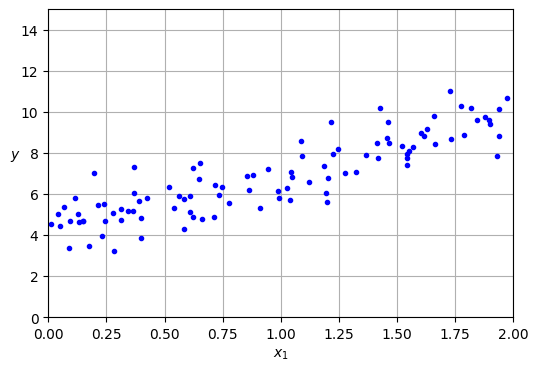

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()